In [58]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('dataset.csv')

In [59]:
df

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

Unnamed 0 не несёт в себе полезную информацию, просто отражает порядковый номер собранного в датасет трека.
Также было бы полезно перевести длительность треков из мс в минуты

In [60]:
columns_to_drop = ['Unnamed: 0']

df = df.drop(columns=columns_to_drop)
df

# Преобразуем продолжительность из миллисекунд в минуты
df['duration_min'] = df['duration_ms'] / 60000

Проверка отдельной выборки по автору

In [61]:
df[df['artists'] == 'Eminem']

track_id artists                             album_name  \
51159  7lQ8MOhq6IN2w8EYcFNSUk  Eminem                        The Eminem Show   
51216  3yfqSUWxFvZELEM4PmlwIR  Eminem                The Marshall Mathers LP   
51369  7Ie9W94M7OjPoZVV216Xus  Eminem                               Recovery   
51523  3kpYJjvM8Ja6btr5hEJLWc  Eminem  Venom (Music From The Motion Picture)   
51614  6or1bKJiZ06IlK0vFvY75k  Eminem      The Marshall Mathers LP2 (Deluxe)   
51939  1v7L65Lzy0j0vdpRjJewt1  Eminem                           Just Lose It   

                                     track_name  popularity  duration_ms  \
51159                                Without Me          88       290320   
51216                       The Real Slim Shady          87       284200   
51369                                Not Afraid          81       248133   
51523     Venom - Music From The Motion Picture          74       269573   
51614                                   Rap God          78       363521   
51939  Lose Yourself - From "8 Mile" Soundtrack          79       322226   

       explicit  danceability  energy  key  ...  mode  speechiness  \
51159      True         0.908   0.669    7  ...     1       0.0738   
51216      True         0.949   0.661    5  ...     0       0.0572   
51369      True         0.855   0.954    0  ...     0       0.2640   
51523      True         0.750   0.789    0  ...     1       0.0647   
51614      True         0.708   0.843    7  ...     1       0.3140   
51939      True         0.686   0.735    2  ...     1       0.2640   

       acousticness  instrumentalness  liveness  valence    tempo  \
51159       0.00286           0.00000    0.2370   0.6620  112.238   
51216       0.03020           0.00000    0.0454   0.7600  104.504   
51369       0.52900           0.00000    0.2050   0.6680  114.635   
51523       0.01480           0.00000    0.5010   0.4670  135.954   
51614       0.39700           0.00000    0.7990   0.6250  148.140   
51939       0.00921           0.00066    0.3420   0.0596  171.355   

       time_signature  track_genre duration_min  
51159               4      hip-hop     4.838667  
51216               4      hip-hop     4.736667  
51369               5      hip-hop     4.135550  
51523               4      hip-hop     4.492883  
51614               4      hip-hop     6.058683  
51939               4      hip-hop     5.370433  

[6 rows x 21 columns]

Выборка по автору, включая совместные проекты

In [62]:
df[df['artists'].str.contains('Eminem', case=False, na=False)]

track_id                              artists  \
20413  2kQuhkFX7uSVepCD3h29g5                          Akon;Eminem   
37220  7iXF2W9vKmDoGAhlHdpyIa                       Dr. Dre;Eminem   
37251  70ATm56tH7OrQ1zurYssz0           Dr. Dre;Eminem;Skylar Grey   
37302  3a2jFwnts4Cf0OwJbK61SL                       Dr. Dre;Eminem   
37355  1SWVDBtw6h3tm9OehOkDhv                Dr. Dre;Eminem;Xzibit   
48068  04w57GO5p1763E44KQ8AKB              Xzibit;Eminem;Nate Dogg   
48117  6LZe8JfVaqcpq8yjkHtWQe      Royce Da 5'9";Eminem;King Green   
48163  4bRPecD9suGW8CfNZhzjS1                      Nas;Eminem;EPMD   
48200  6SMrWEWukd0DWh5iHGWgks          The Notorious B.I.G.;Eminem   
48359  6s4kWgzQwsueo3mfllY1s6          The Notorious B.I.G.;Eminem   
48361  0Bb21NEv7yjSJ8ro2k2SZC                        Xzibit;Eminem   
48363  5EWWCzpA6D8UTRbVQbScp6          Tony Yayo;Eminem;Obie Trice   
48462  1ygjXzCzApOeNr396plHmT                Obie Trice;D12;Eminem   
48607  2nd0a9U9ICncohQPtjtVey     Funk Flex;Big Kap;Eminem;Dr. Dre   
48706  2uiEqPjMmIJXOKplzsEASP  Fat Joe;Eminem;Lil Jon;Mase;Remy Ma   
48860  0jRj0owDUMxxbmz2qkgtSC            Obie Trice;50 Cent;Eminem   
51159  7lQ8MOhq6IN2w8EYcFNSUk                               Eminem   
51216  3yfqSUWxFvZELEM4PmlwIR                               Eminem   
51277  4xkOaSrkexMciUUogZKVTS                     Eminem;Nate Dogg   
51301  3UmaczJpikHgJFyBTAJVoz                          Eminem;Dido   
51320  7FIWs0pqAYbP91WWM0vlTQ                    Eminem;Juice WRLD   
51369  7Ie9W94M7OjPoZVV216Xus                               Eminem   
51401  15JINEqzVMv3SvJTAXAKED                       Eminem;Rihanna   
51503  4woTEX1wYOTGDqNXuavlRC                      Eminem;Dina Rae   
51523  3kpYJjvM8Ja6btr5hEJLWc                               Eminem   
51614  6or1bKJiZ06IlK0vFvY75k                               Eminem   
51939  1v7L65Lzy0j0vdpRjJewt1                               Eminem   
79069  5W8HXMOMLtXLz0RGKUtnlZ      Skylar Grey;Polo G;Mozzy;Eminem   
79173  3r9m79pHykbs4FrCXlq1oO      Skylar Grey;Polo G;Mozzy;Eminem   
79201  0rI56S1biB0efYypn7eNpP                   Skylar Grey;Eminem   
79253  1FJYqedfrSGitGHMvwRGBg          Skylar Grey;Eminem;Yelawolf   
91270  5W8HXMOMLtXLz0RGKUtnlZ      Skylar Grey;Polo G;Mozzy;Eminem   

                                              album_name  \
20413                                          Konvicted   
37220                                               2001   
37251                                    I Need A Doctor   
37302                               Gospel (with Eminem)   
37355                                               2001   
48068                                     Man VS Machine   
48117                 Book of Ryan (Bonus Track Edition)   
48163                                  King's Disease II   
48200                                      Greatest Hits   
48359                                         Born Again   
48361                                           Restless   
48363                      Thoughts Of A Predicate Felon   
48462                                             Cheers   
48607                                         The Tunnel   
48706                                     All Or Nothing   
48860  8 Mile (Music From And Inspired By The Motion ...   
51159                                    The Eminem Show   
51216                            The Marshall Mathers LP   
51277                                    The Eminem Show   
51301                            The Marshall Mathers LP   
51320                            Music To Be Murdered By   
51369                                           Recovery   
51401                                           Recovery   
51503                                    The Eminem Show   
51523              Venom (Music From The Motion Picture)   
51614                  The Marshall Mathers LP2 (Deluxe)   
51939                                       Just Lose It   
79069  Last One Standing (feat

Топ 5 популярных треков

In [63]:
# Группируем по исполнителям, считаем сумму и количество треков
artist_popularity = (
    df.groupby('artists')['popularity']
    .agg(['sum', 'count'])  # Считаем сумму и количество треков
    .rename(columns={'sum': 'total_popularity', 'count': 'track_count'})
)

# Рассчитываем среднюю популярность исполнителя
artist_popularity['average_popularity'] = artist_popularity['total_popularity'] / artist_popularity['track_count']

# Сохраняем только исполнителя и его среднюю популярность
artist_popularity = artist_popularity[['average_popularity']].reset_index()

# Сортируем по средней популярности в порядке убывания
artist_popularity = artist_popularity.sort_values(by='average_popularity', ascending=False)

# Выводим результат
print(artist_popularity.head())  # Для просмотра первых строк

                          artists  average_popularity
24119        Sam Smith;Kim Petras               100.0
3629             Bizarrap;Quevedo                99.0
17442               Manuel Turizo                98.0
2857   Bad Bunny;Chencho Corleone                97.0
2855      Bad Bunny;Bomba Estéreo                94.5


График эмоционального воздействия, основанный на "Energy" и "Valence"

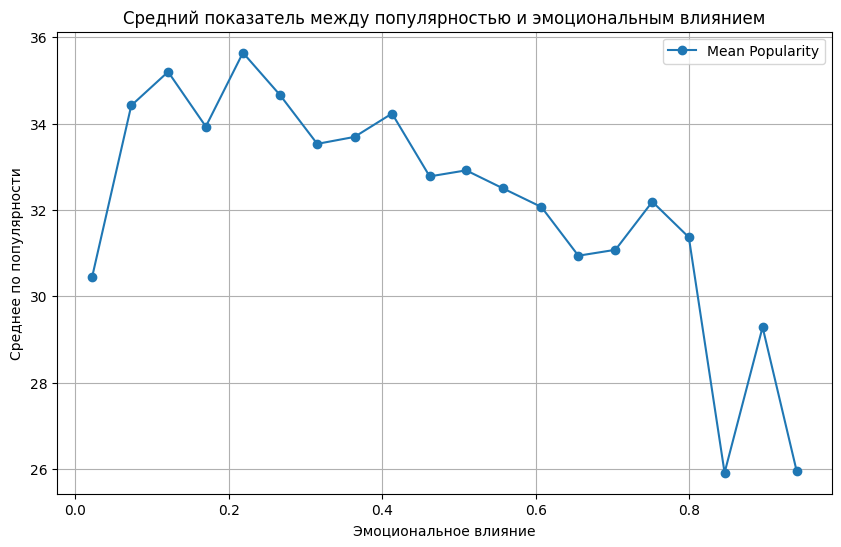

In [64]:
df['emotional_impact'] = df['energy'] * df['valence']

# Разбиваем на интервалы
bins = pd.cut(df['emotional_impact'], bins=20, labels=False)

# Среднее значение популярности по интервалам
bin_means = df.groupby(bins)['popularity'].mean()
bin_centers = df.groupby(bins)['emotional_impact'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, bin_means, marker='o', linestyle='-', label='Mean Popularity')
plt.title('Средний показатель между популярностью и эмоциональным влиянием')
plt.xlabel('Эмоциональное влияние')
plt.ylabel('Среднее по популярности')
plt.grid()
plt.legend()
plt.show()

По описанию Valence - значение, указывающее на положительность эмоций трека. На графике видно, что негативные и нейтральные треки более популярны, чем положительные.

Рассмотрим как популярность зависит от танцевальности

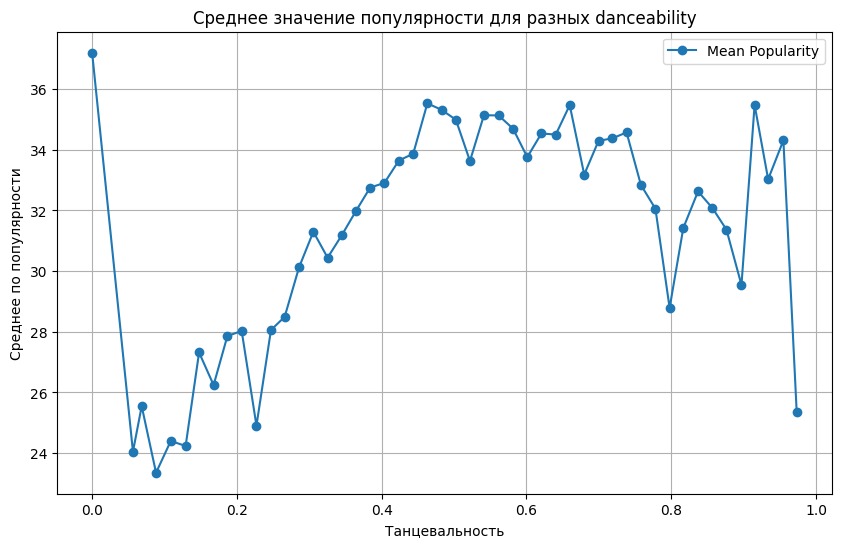

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Подготовка данных
# Разбиваем 'danceability' на 10 равных интервалов
bins = pd.cut(df['danceability'], bins=50, labels=False)

# Вычисляем среднее значение популярности для каждого интервала
bin_means = df.groupby(bins)['popularity'].mean()

# Находим средние значения 'danceability' для каждого интервала
bin_centers = df.groupby(bins)['danceability'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, bin_means, marker='o', linestyle='-', label='Mean Popularity')
plt.title('Среднее значение популярности для разных danceability')
plt.xlabel('Танцевальность')
plt.ylabel('Среднее по популярности')
plt.grid()
plt.legend()
plt.show()

Отчётливо видно, что треки популярны, если они имеют танцевальность выше 0.2-0.3. Хороший ритм стимулирует повторному прослушиванию треков.

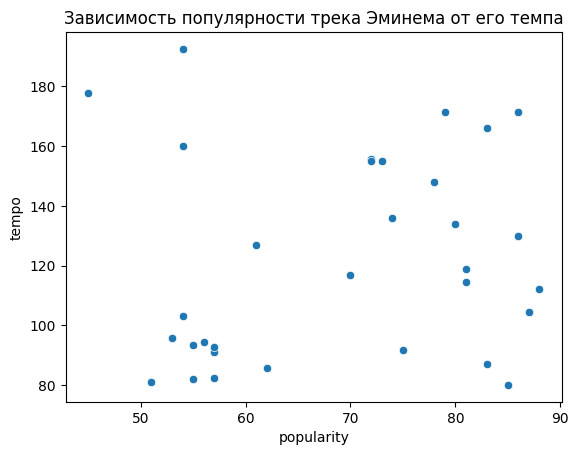

In [66]:
my_df = df[df['artists'].str.contains('Eminem', case=False, na=False)]
sns.scatterplot(data=my_df, x='popularity', y='tempo')
plt.title('Зависимость популярности трека Эминема от его темпа')
plt.show()

Если автор популярен, то не всегда популярность зависит от темпа.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

<Figure size 1600x1200 with 0 Axes>

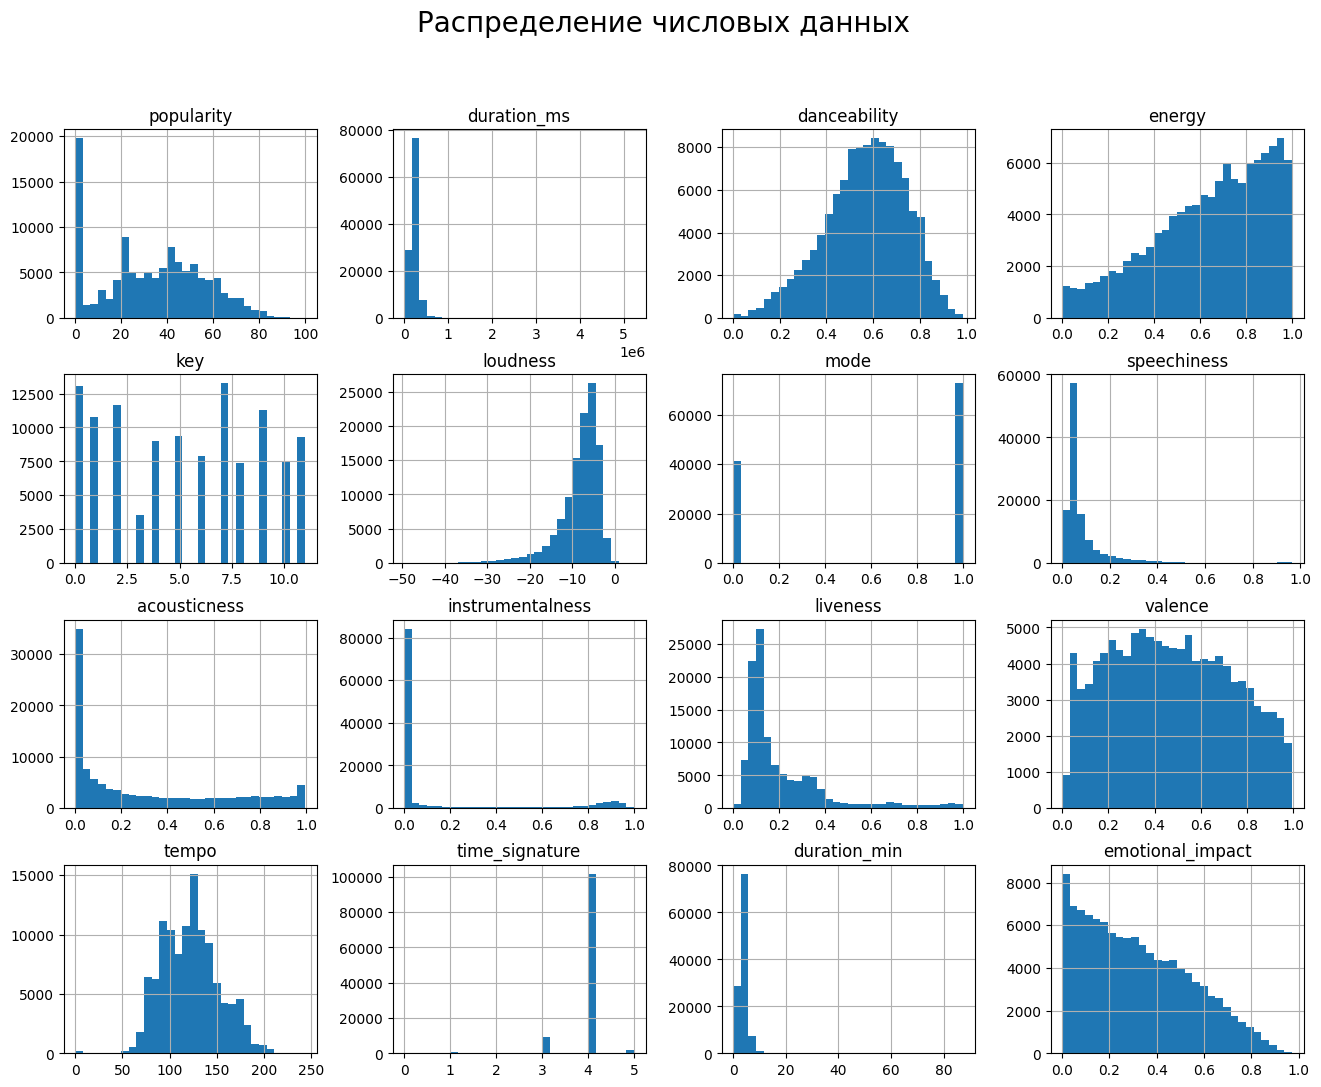

In [68]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16, 12))
df[numerical_columns].hist(bins=30, figsize=(16, 12))
plt.suptitle('Распределение числовых данных', fontsize=20)
plt.show()


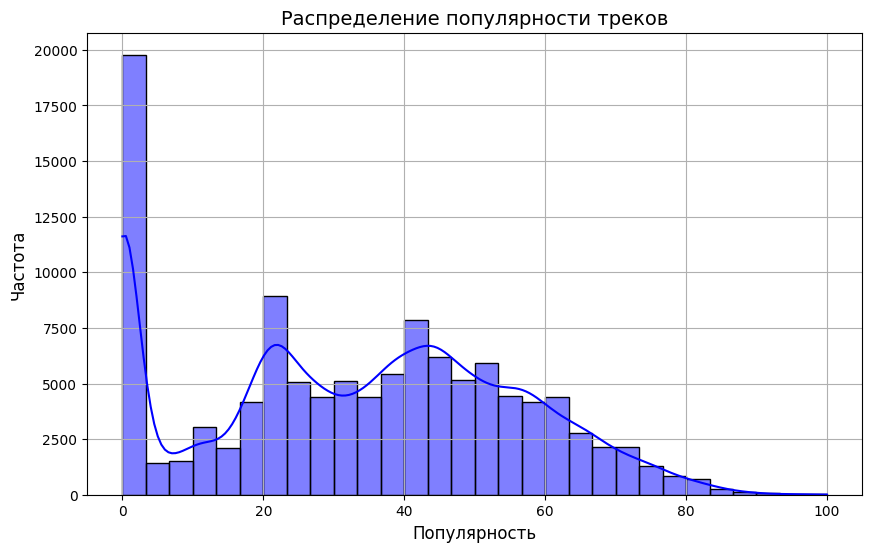

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
emotional_impact    0
dtype: int64

In [69]:
# Проверка пропусков
missing_values = df.isnull().sum()

# Распределение целевой переменной popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True, bins=30, color='blue')
plt.title('Распределение популярности треков', fontsize=14)
plt.xlabel('Популярность', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)
plt.show()

missing_values

Большинство треков вовсе не популярны.

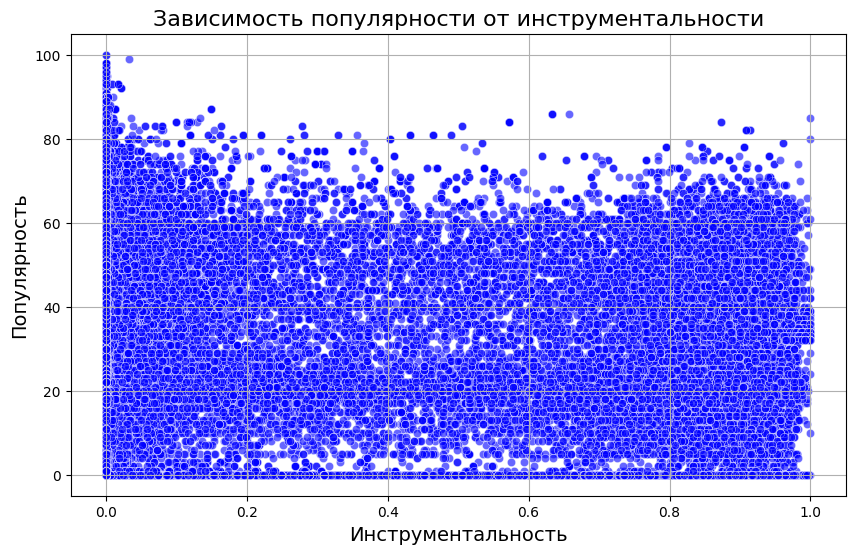

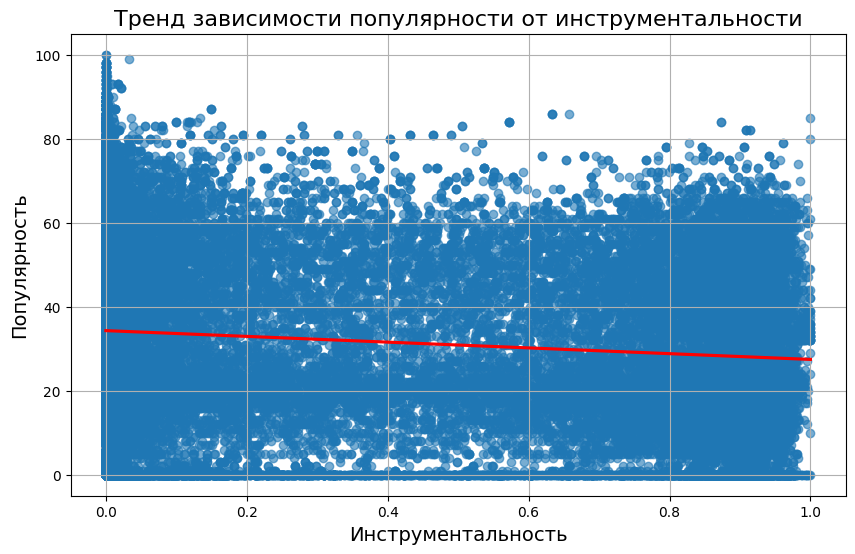

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='instrumentalness', y='popularity', alpha=0.6, color='blue')

plt.title('Зависимость популярности от инструментальности', fontsize=16)
plt.xlabel('Инструментальность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='instrumentalness', y='popularity', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

plt.title('Тренд зависимости популярности от инструментальности', fontsize=16)
plt.xlabel('Инструментальность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.grid(True)
plt.show()

Более инструментальные треки чуть менее популярны.

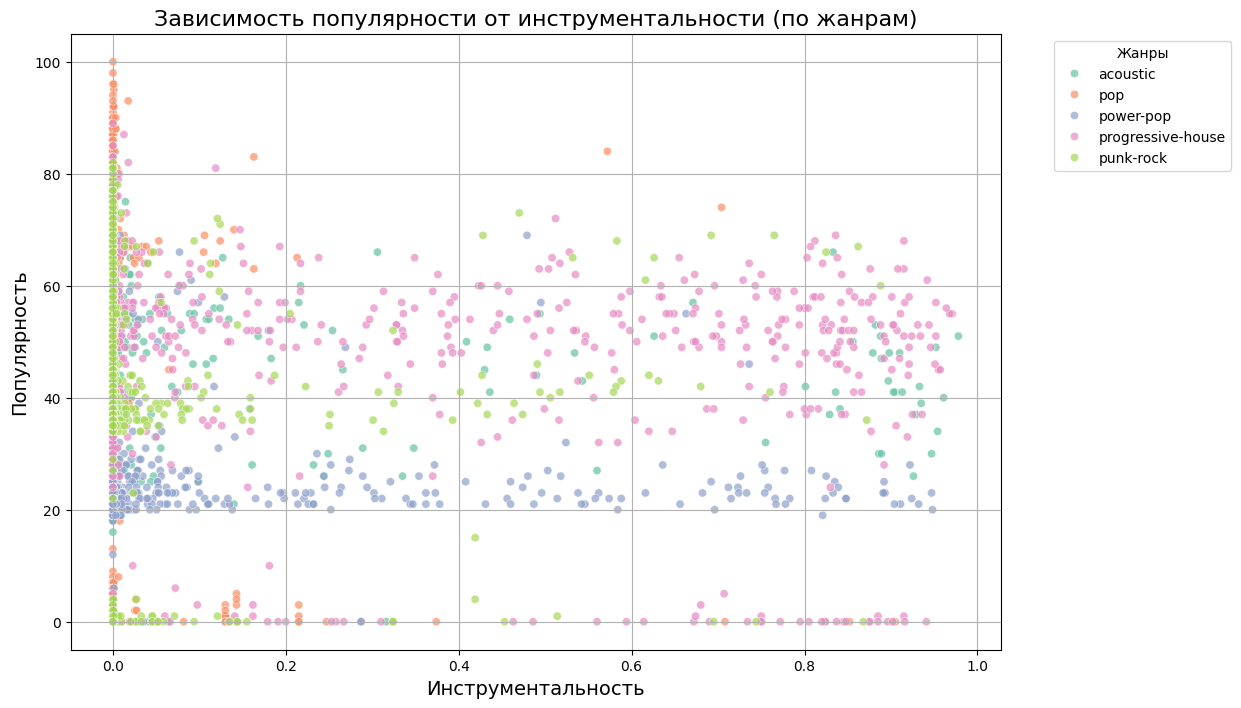

In [71]:
# Выбор топ-5 жанров по количеству треков
top_genres = df['track_genre'].value_counts().head(5).index
filtered_df = df[df['track_genre'].isin(top_genres)]

# Построение графика
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_df,
    x='instrumentalness',
    y='popularity',
    hue='track_genre',
    palette='Set2',
    alpha=0.7
)

plt.title('Зависимость популярности от инструментальности (по жанрам)', fontsize=16)
plt.xlabel('Инструментальность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.legend(title='Жанры', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

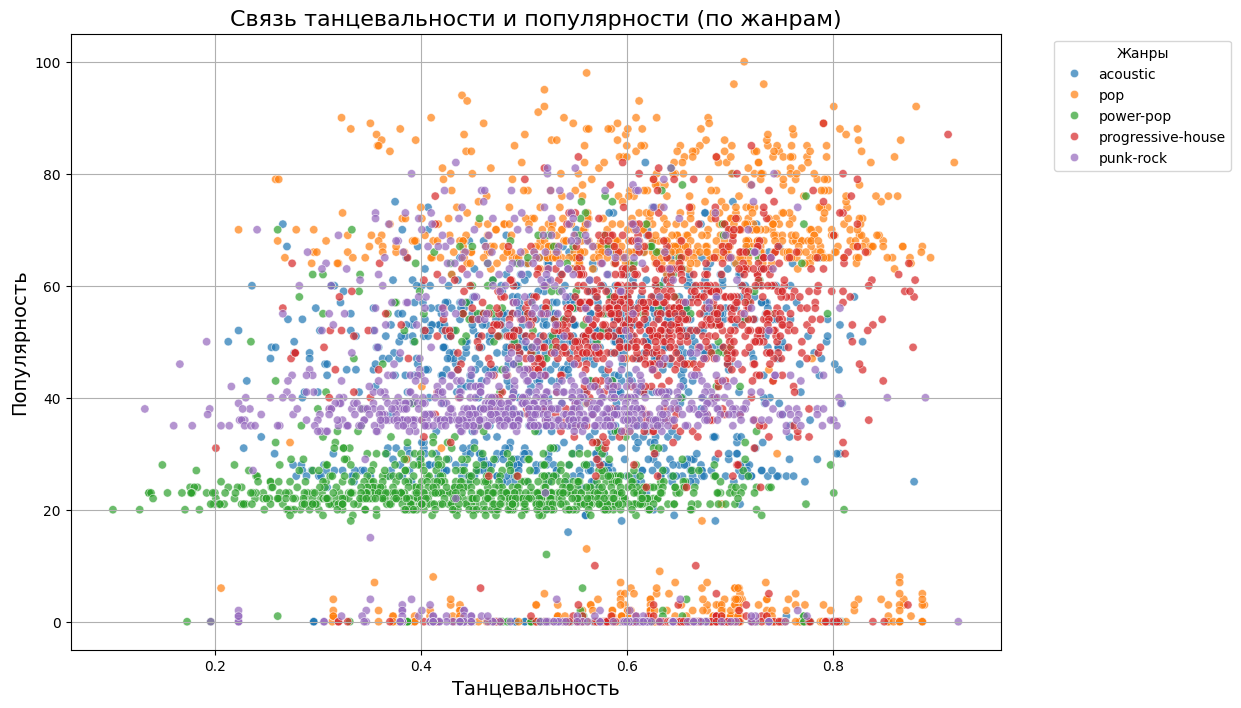

In [72]:
# Выбор топ-5 жанров по количеству треков
top_genres = df['track_genre'].value_counts().head(5).index
filtered_df = df[df['track_genre'].isin(top_genres)]

# Построение графика
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_df,
    x='danceability',
    y='popularity',
    hue='track_genre',
    palette='tab10',
    alpha=0.7
)

plt.title('Связь танцевальности и популярности (по жанрам)', fontsize=16)
plt.xlabel('Танцевальность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.legend(title='Жанры', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

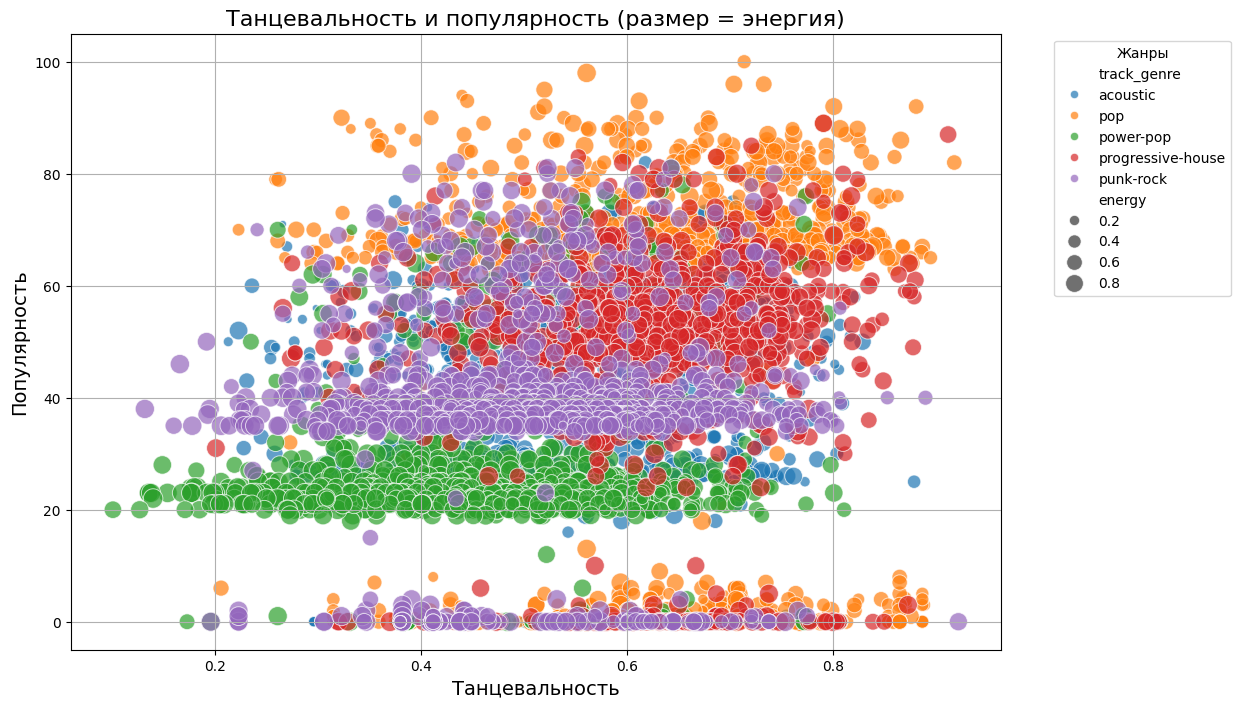

In [73]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=filtered_df,
    x='danceability',
    y='popularity',
    hue='track_genre',
    size='energy',
    sizes=(20, 200),
    alpha=0.7,
    palette='tab10'
)

plt.title('Танцевальность и популярность (размер = энергия)', fontsize=16)
plt.xlabel('Танцевальность', fontsize=14)
plt.ylabel('Популярность', fontsize=14)
plt.legend(title='Жанры', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

По данным трёх графиков Поп является более популярным жанром, учитывая то, что он наименее инструментален.

In [74]:
df = df.dropna()

In [75]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
emotional_impact    0
dtype: int64

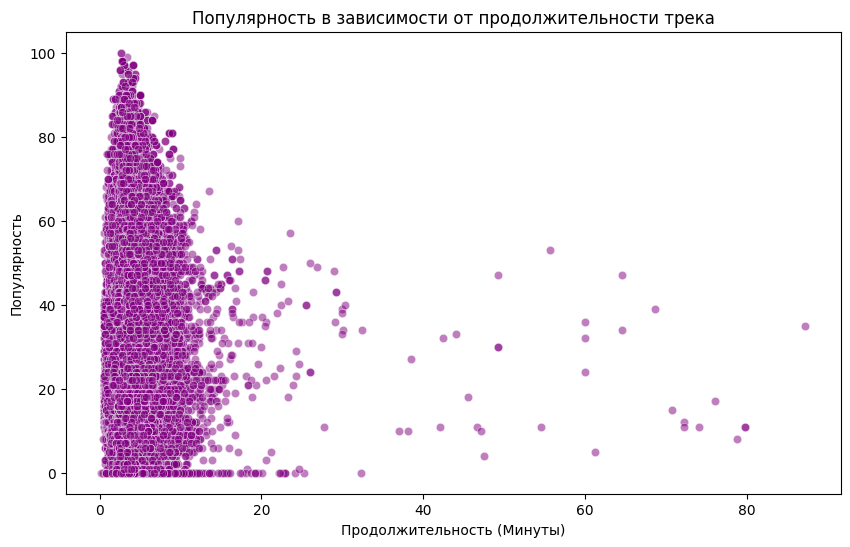

In [86]:
# Построение графика зависимости популярности от продолжительности трека
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['duration_min'], y=df['popularity'], alpha=0.5, color="purple")
plt.title("Популярность в зависимости от продолжительности трека")
plt.xlabel("Продолжительность (Минуты)")
plt.ylabel("Популярность")
plt.show()


Продолжительность не сильно влияет на популярность, наоборот, более длительные произведения могут иметь популярность меньше 60. Оптимальное значение для популярных треков от 0 до 10 минут.

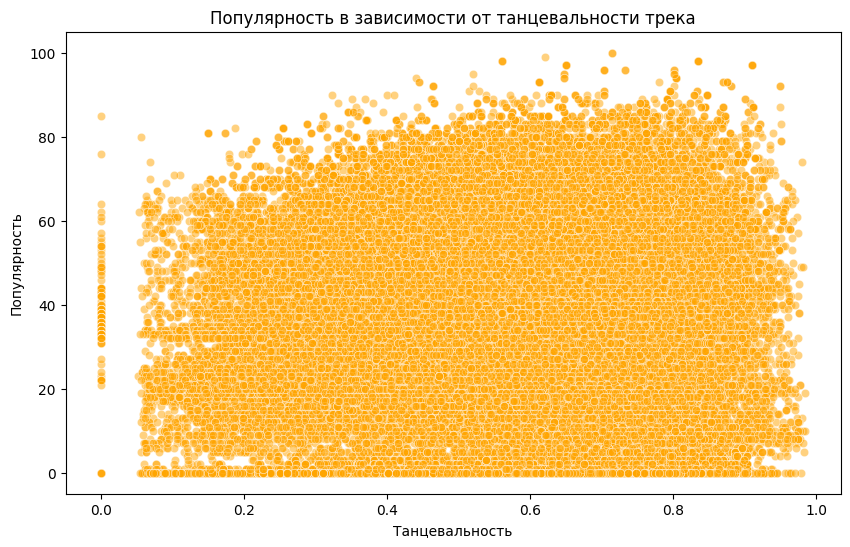

In [77]:
# Построение графика зависимости популярности от танцевальности
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['danceability'], y=df['popularity'], alpha=0.5, color="orange")
plt.title("Популярность в зависимости от танцевальности трека")
plt.xlabel("Танцевальность")
plt.ylabel("Популярность")
plt.show()

Танцевальность незначительно влияет на популярность, с увеличением танцевальности популярность слегка выше.

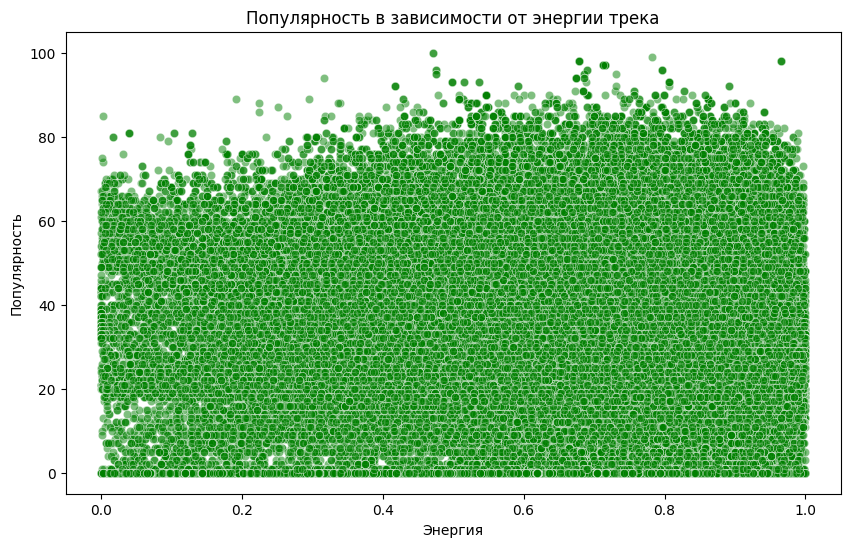

In [78]:
# Построение графика зависимости популярности от энергии трека
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['energy'], y=df['popularity'], alpha=0.5, color="green")
plt.title("Популярность в зависимости от энергии трека")
plt.xlabel("Энергия")
plt.ylabel("Популярность")
plt.show()


Более энергичные треки имеют более высокую популярность

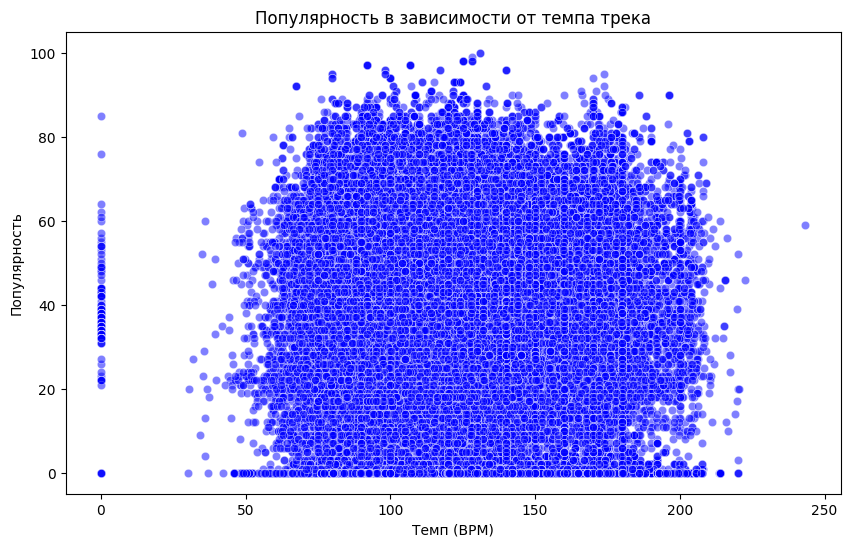

In [79]:
# Построение графика зависимости популярности от темпа трека
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tempo'], y=df['popularity'], alpha=0.5, color="blue")
plt.title("Популярность в зависимости от темпа трека")
plt.xlabel("Темп (BPM)")
plt.ylabel("Популярность")
plt.show()


Популярнее всего треки, которые имеют более высокий темп, но не очень быстрый. В основном это 70-170bpm

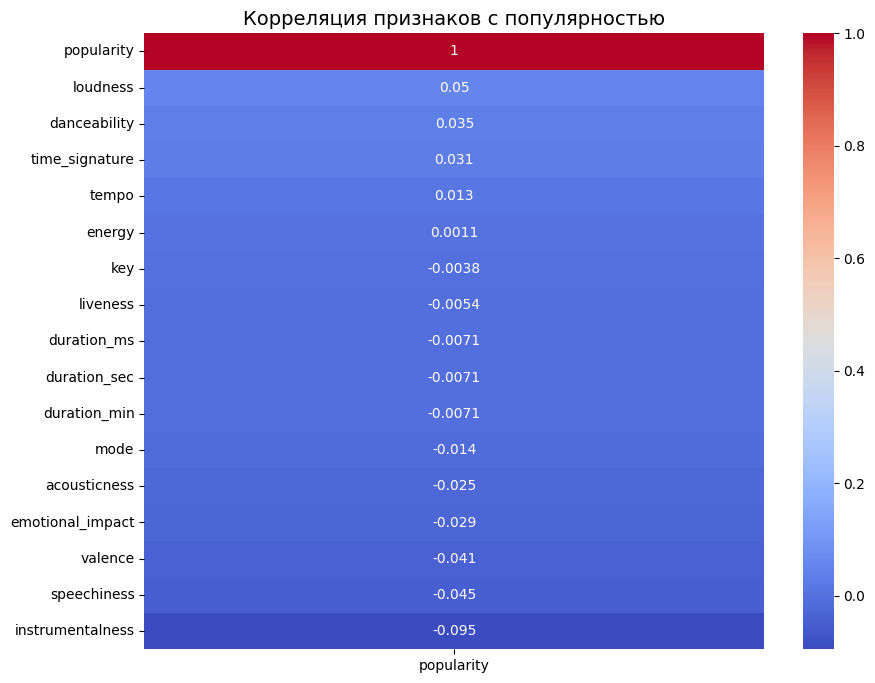

popularity          1.000000
loudness            0.050420
danceability        0.035444
time_signature      0.031076
tempo               0.013212
energy              0.001053
key                -0.003847
liveness           -0.005397
duration_ms        -0.007129
duration_sec       -0.007129
duration_min       -0.007129
mode               -0.013948
acousticness       -0.025458
emotional_impact   -0.029292
valence            -0.040522
speechiness        -0.044930
instrumentalness   -0.095147
Name: popularity, dtype: float64


In [80]:
# Выбор только числовых колонок
numerical_df = df.select_dtypes(include=['number'])

# Построение корреляционной матрицы
correlation_matrix = numerical_df.corr()

# Тепловая карта корреляций с целевой переменной 'popularity'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False),
            annot=True, cmap='coolwarm', cbar=True)
plt.title('Корреляция признаков с популярностью', fontsize=14)
plt.show()

# Список наиболее значимых коррелирующих признаков
top_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(top_correlations)

Проверка новых признаков: Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min',
       'emotional_impact', 'duration_sec', 'energy_tempo_ratio',
       'intensity_score', 'vocal_presence', 'danceability_per_second',
       'emotional_complexity', 'potential_popularity', 'complexity_score'],
      dtype='object')
                         popularity  duration_ms  danceability    energy  \
energy_tempo_ratio         0.000041     0.035302      0.153863  0.809706   
intensity_score            0.048597    -0.000528      0.255916  0.781535   
vocal_presence            -0.065906    -0.016208     -0.214519  0.181807   
danceability_per_second   -0.009445    -0.525809      0.566940 -0.041999   
emotional_complexity      -0.005931    -0.063280      0

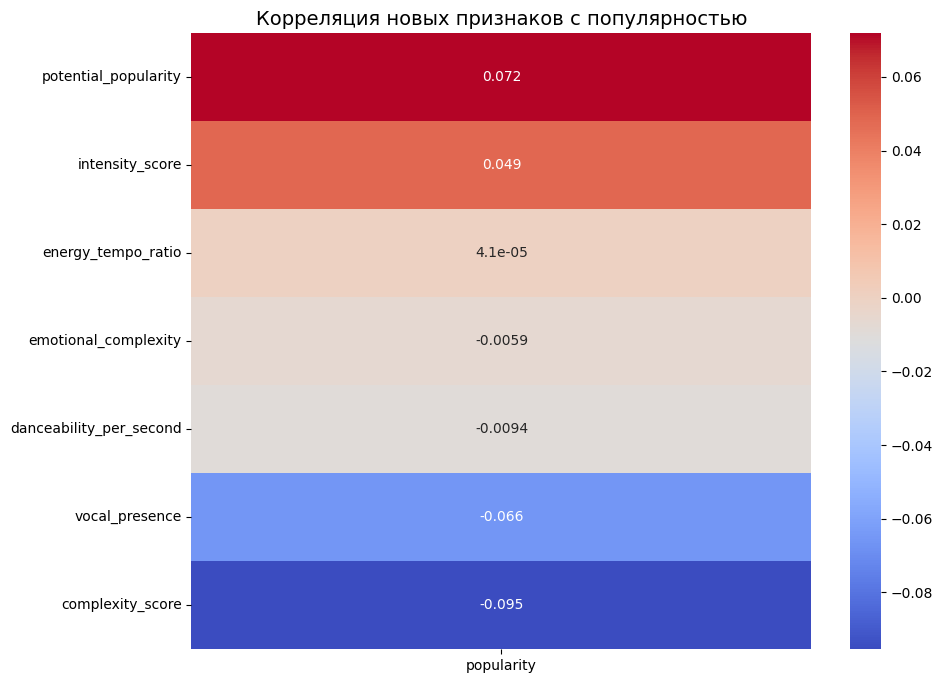

In [81]:
# Убедимся, что все новые признаки созданы правильно и доступны для корреляции
df['energy_tempo_ratio'] = df['energy'] / df['tempo']
df['intensity_score'] = (df['loudness'] + df['energy']) / 2
df['vocal_presence'] = df['speechiness'] / (df['acousticness'] + 1e-5)
df['danceability_per_second'] = df['danceability'] / (df['duration_ms'] / 60000)
df['emotional_complexity'] = df['valence'] * df['liveness']
df['potential_popularity'] = (df['danceability'] + df['energy'] + (1 - df['instrumentalness'])) / 3
df['complexity_score'] = (df['speechiness'] + df['instrumentalness'] + df['liveness']) / 3

# Проверка наличия новых колонок
print("Проверка новых признаков:", df.columns)

# Исключение всех нечисловых колонок
numeric_df = df.select_dtypes(include=['number'])

# Новый список признаков без 'duration_category_encoded'
new_features = ['energy_tempo_ratio', 'intensity_score', 'vocal_presence', 'danceability_per_second', 'emotional_complexity', 'potential_popularity', 'complexity_score']

# Пересчет корреляции
correlation_matrix = numeric_df.corr()

# Проверка, что нужные признаки присутствуют
available_features = set(correlation_matrix.index)
missing_features = [f for f in new_features if f not in available_features]

if missing_features:
    print(f"Следующие признаки отсутствуют в матрице корреляции: {missing_features}")
else:
    # Отображение корреляции новых признаков
    correlation_with_new_features = correlation_matrix.loc[new_features]
    print(correlation_with_new_features)

    # Построение тепловой карты корреляции с целевой переменной 'popularity'
plt.figure(figsize=(10, 8))

# Сортировка и визуализация корреляции для новых признаков
sns.heatmap(correlation_matrix[['popularity']].loc[new_features].sort_values(by='popularity', ascending=False),
            annot=True, cmap='coolwarm', cbar=True)

# Добавление заголовка
plt.title('Корреляция новых признаков с популярностью', fontsize=14)

# Отображение карты
plt.show()



Из новых данных положительные значения имеют energy_tempo_ratio, intensity_score, potential_popularity

Попробуем сначала проверить метрики с оригинальными данными.

In [82]:
# Выбор числовых признаков для модели
numerical_features = [
    'loudness', 'explicit', 'danceability', 'instrumentalness',
    'speechiness', 'valence', 'duration_ms', 'energy', 'tempo'
]
# Разделение данных на обучающую и тестовую выборки
X = df[numerical_features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение базовой линейной модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Предсказания и оценка
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 485.61
R^2 Score: 0.02


<ipython-input-83-97469b1cd3bf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


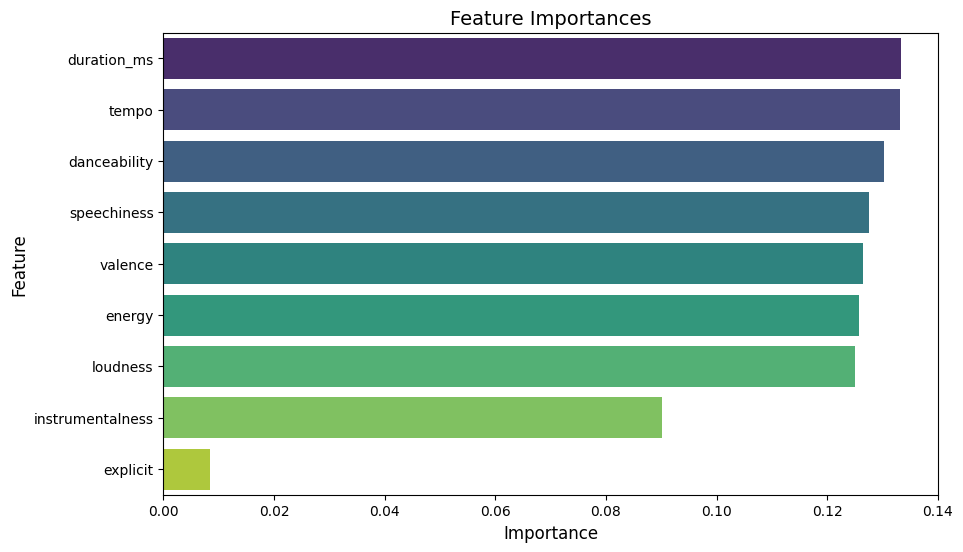

            Feature  Importance
6       duration_ms    0.133382
8             tempo    0.133169
2      danceability    0.130247
4       speechiness    0.127558
5           valence    0.126358
7            energy    0.125760
0          loudness    0.125044
3  instrumentalness    0.090113
1          explicit    0.008369


In [83]:
# Обучение Random Forest для оценки значимости признаков
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Извлечение значимости признаков
feature_importances = rf_model.feature_importances_

# Создание DataFrame для удобной визуализации
importance_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализация значимости признаков
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

print(importance_df)


In [93]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Модифицированная функция для вывода результатов по каждому fold
def evaluate_model(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        fold_scores.append(rmse)
        print(f"Fold {fold}: RMSE = {rmse:.2f}")

    return np.mean(fold_scores), np.std(fold_scores)

# Модели
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Оценка моделей
results = {}
for model_name, model in models.items():
    print(f"\nОценка модели: {model_name}")
    mean_rmse, std_rmse = evaluate_model(model, X, y)
    results[model_name] = {'Mean RMSE': mean_rmse, 'Std RMSE': std_rmse}
    print(f"Среднее RMSE = {mean_rmse:.2f}, Std RMSE = {std_rmse:.2f}")

# Сравнение моделей
results_df = pd.DataFrame(results).T.sort_values(by='Mean RMSE')
print("\nИтоговое сравнение моделей:")
print(results_df)


Оценка модели: Linear Regression
Fold 1: RMSE = 22.04
Fold 2: RMSE = 22.07
Fold 3: RMSE = 22.07
Fold 4: RMSE = 21.97
Fold 5: RMSE = 22.04
Среднее RMSE = 22.04, Std RMSE = 0.04

Оценка модели: Decision Tree
Fold 1: RMSE = 20.40
Fold 2: RMSE = 20.99
Fold 3: RMSE = 20.89
Fold 4: RMSE = 20.66
Fold 5: RMSE = 20.72
Среднее RMSE = 20.73, Std RMSE = 0.21

Оценка модели: XGBoost
Fold 1: RMSE = 19.32
Fold 2: RMSE = 19.40
Fold 3: RMSE = 19.53
Fold 4: RMSE = 19.33
Fold 5: RMSE = 19.45
Среднее RMSE = 19.41, Std RMSE = 0.08

Оценка модели: Neural Network
Fold 1: RMSE = 63.65
Fold 2: RMSE = 26.15
Fold 3: RMSE = 24.74
Fold 4: RMSE = 24.86
Fold 5: RMSE = 26.76
Среднее RMSE = 33.23, Std RMSE = 15.23

Оценка модели: Gradient Boosting
Fold 1: RMSE = 21.35
Fold 2: RMSE = 21.38
Fold 3: RMSE = 21.41
Fold 4: RMSE = 21.27
Fold 5: RMSE = 21.39
Среднее RMSE = 21.36, Std RMSE = 0.05

Итоговое сравнение моделей:
                   Mean RMSE   Std RMSE
XGBoost            19.405754   0.080498
Decision Tree      20.

Дальше проверим с новыми данными

In [98]:
# тест для новых данных
# Выбор числовых признаков для модели
numerical_features = [
    'loudness', 'explicit', 'danceability', 'instrumentalness',
    'speechiness', 'valence', 'duration_ms', 'energy', 'tempo',
    'energy_tempo_ratio', 'intensity_score', 'vocal_presence', 'danceability_per_second', 'emotional_complexity', 'potential_popularity', 'complexity_score'
]
# Разделение данных на обучающую и тестовую выборки
X = df[numerical_features]
y = df['popularity']
y = y[X.index]  # Обновляем y, чтобы оно соответствовало X
# Заменим все значения inf на NaN
X = X.replace([np.inf, -np.inf], np.nan)
#dropna увеличивает ошибку
# Заполнение пропущенных значений средним значением
X = X.fillna(X.mean())

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение и оценка модели
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 482.27
R^2 Score: 0.03


<ipython-input-99-dd8aa7c38cfb>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


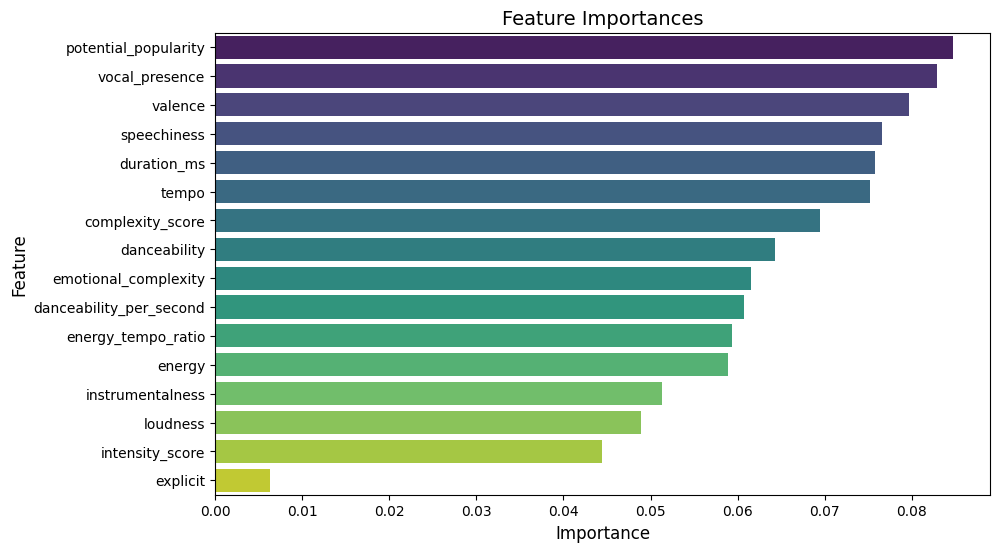

                    Feature  Importance
14     potential_popularity    0.084736
11           vocal_presence    0.082907
5                   valence    0.079668
4               speechiness    0.076552
6               duration_ms    0.075792
8                     tempo    0.075175
15         complexity_score    0.069433
2              danceability    0.064261
13     emotional_complexity    0.061517
12  danceability_per_second    0.060748
9        energy_tempo_ratio    0.059390
7                    energy    0.058942
3          instrumentalness    0.051301
0                  loudness    0.048897
10          intensity_score    0.044394
1                  explicit    0.006287


In [99]:
#Feature Importances с новыми данными

# Обучение Random Forest для оценки значимости признаков
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Извлечение значимости признаков
feature_importances = rf_model.feature_importances_

# Создание DataFrame для удобной визуализации
importance_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализация значимости признаков
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

print(importance_df)

Potential Popularity оказался самым высоким значением Feature Importance

In [100]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Модифицированная функция для вывода результатов по каждому fold
def evaluate_model(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(X), 1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        fold_scores.append(rmse)
        print(f"Fold {fold}: RMSE = {rmse:.2f}")

    return np.mean(fold_scores), np.std(fold_scores)

# Модели
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=100),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Оценка моделей
results = {}
for model_name, model in models.items():
    print(f"\nОценка модели: {model_name}")
    mean_rmse, std_rmse = evaluate_model(model, X, y)
    results[model_name] = {'Mean RMSE': mean_rmse, 'Std RMSE': std_rmse}
    print(f"Среднее RMSE = {mean_rmse:.2f}, Std RMSE = {std_rmse:.2f}")

# Сравнение моделей
results_df = pd.DataFrame(results).T.sort_values(by='Mean RMSE')
print("\nИтоговое сравнение моделей:")
print(results_df)


Оценка модели: Linear Regression
Fold 1: RMSE = 21.96
Fold 2: RMSE = 22.01
Fold 3: RMSE = 22.03
Fold 4: RMSE = 21.92
Fold 5: RMSE = 21.98
Среднее RMSE = 21.98, Std RMSE = 0.04

Оценка модели: Decision Tree
Fold 1: RMSE = 20.56
Fold 2: RMSE = 20.76
Fold 3: RMSE = 20.85
Fold 4: RMSE = 20.82
Fold 5: RMSE = 20.74
Среднее RMSE = 20.75, Std RMSE = 0.10

Оценка модели: XGBoost
Fold 1: RMSE = 19.05
Fold 2: RMSE = 19.09
Fold 3: RMSE = 19.27
Fold 4: RMSE = 19.09
Fold 5: RMSE = 19.22
Среднее RMSE = 19.14, Std RMSE = 0.09

Оценка модели: Neural Network
Fold 1: RMSE = 24.34
Fold 2: RMSE = 23.39
Fold 3: RMSE = 463.40
Fold 4: RMSE = 23.27
Fold 5: RMSE = 23.60
Среднее RMSE = 111.60, Std RMSE = 175.90

Оценка модели: Gradient Boosting
Fold 1: RMSE = 21.27
Fold 2: RMSE = 21.31
Fold 3: RMSE = 21.38
Fold 4: RMSE = 21.18
Fold 5: RMSE = 21.31
Среднее RMSE = 21.29, Std RMSE = 0.06

Итоговое сравнение моделей:
                    Mean RMSE    Std RMSE
XGBoost             19.144180    0.086016
Decision Tree  